In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
#把鸢尾花iris-setosa，Iris-versicolor和iris-virginica三个分类标签以整数（0，1，2）存储
Y = iris.target
print('Class labels:',np.unique(Y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
#利用train_test_split函数把X,Y阵列分为30%的测试数据和70%的训练数据
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
 

In [3]:
print('Labels counts in Y:', np.bincount(Y))

Labels counts in Y: [50 50 50]


In [4]:
print('Labels counts in Y_train:', np.bincount(Y_train))

Labels counts in Y_train: [35 35 35]


In [5]:
print('Labels counts in Y_test:', np.bincount(Y_test))

Labels counts in Y_test: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler
#利用StandardScaler来对特征进行标准化
sc = StandardScaler()
#调用方法fit()对训练数据的每个特征维度参数μ（样本均值）和σ（标准偏差）进行估算
sc.fit(X_train)
#调用transform方法，利用估计的参数μ和σ对训练数据进行标准化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, Y_train)
Y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())

Misclassified samples: 8


In [8]:
from sklearn.metrics import accuracy_score
#计算测试集上感知器的分类标准度
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

Accuracy: 0.82


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, Y, classifier, test_idx=None, resolution=0.02):
    #画出目标界面
    x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1  #横坐标最大值和最小值
    x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1  #纵坐标最大值和最小值
    #绘制网格图，利用矩阵
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #ravel函数将矩阵变为一维数组
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #填充等高线
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(Y)):
        #X,Y均为矩阵，把点画出来
        plt.scatter(x=X[Y == cl,0] , y=X[Y == cl,1] , alpha = 0.8 , c = colors[idx] , marker = markers[idx] , label = cl , edgecolor = 'black')
    
    #强调测试样本
    if test_idx:
        #画出所有样本
        X_test, Y_test = X[test_idx, :], Y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolors='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
    #定义颜色和标记，创建色度图
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])



In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))

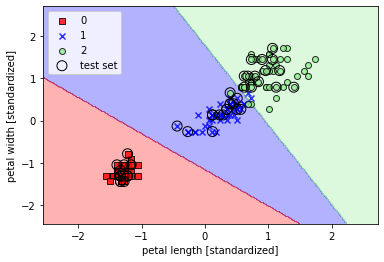

In [11]:
#逻辑回归模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std,Y_train)
plot_decision_regions(X_combined_std, Y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [13]:
#计算训练集中某个特定类的概率
lr.predict_proba(X_test_std[:3, :])
#可识别分类标签
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

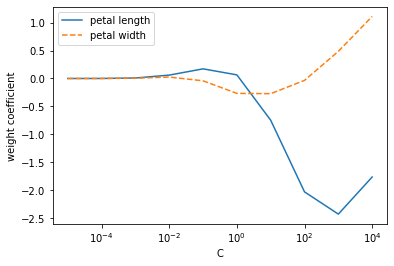

In [14]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, Y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

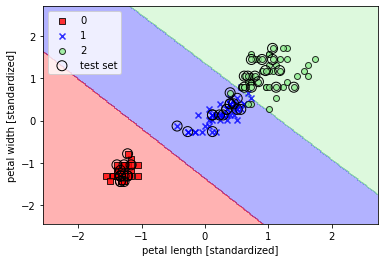

In [15]:
#支持向量机模型
from sklearn.svm import SVC
#减少C值增加偏置，降低方差
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, Y_train)
plot_decision_regions(X_combined_std, Y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

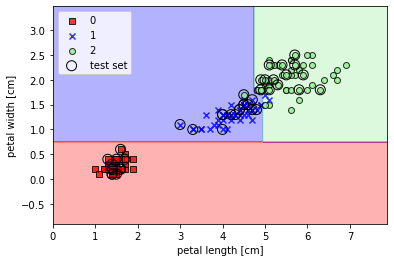

In [17]:
#决策树模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, Y_train)
X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X_combined, Y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

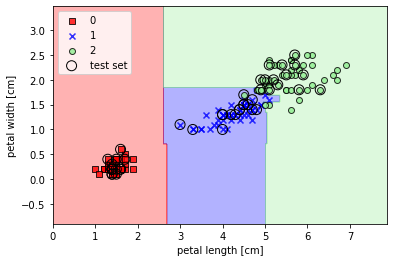

In [19]:
#随机森林分类器
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, Y_train)
plot_decision_regions(X_combined, Y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

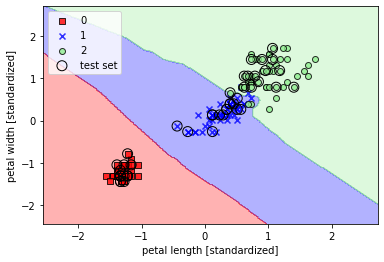

In [21]:
#KNN算法模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, Y_train)
plot_decision_regions(X_combined_std, Y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [13]:
print(X)
print(Y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]